## <font color ='green'> VADER, or the Valence Aware Dictionary and sEntiment Reasoner </font>

#### There are two types of sentiment analyzing approcahes - Polarity and Valence based. 
#### VADER is a VALENCE based sentiment analyzer. 

#### Valence based approach taken into consideration the "intensity" of a word as opposed to only the polarity (+ve or -ve). For ex. "Great" is more treated as more +ve as opposed to "Good". 

#### Sentiment analysis is a perfect approach to sieve and respond to unstructured data - social media, product reviews, etc. 

### Ideal scale for classification based on compound value:
   #### 1.  Neutral = -0.5 > and <= 0.5
   #### 2. Positive = >0.5
   #### 3. Negative = <=-0.5


#### References:
#### http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

In [1]:
import pandas as pd #Importing the PANDAS python library
import numpy as np #importing Numpy
%matplotlib inline 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #initiating VADER instance

analyser = SentimentIntensityAnalyzer()

### Sourcing twitter data from Kaggle

In [2]:
#https://www.kaggle.com/crowdflower/twitter-airline-sentiment

sentences = pd.read_csv('Tweets.csv')

len(sentences)

14640

In [3]:
sentences.columns #I dont need all the columns for this demo

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
sentences.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### How does United stack up against its competitors (based on human scoring)?

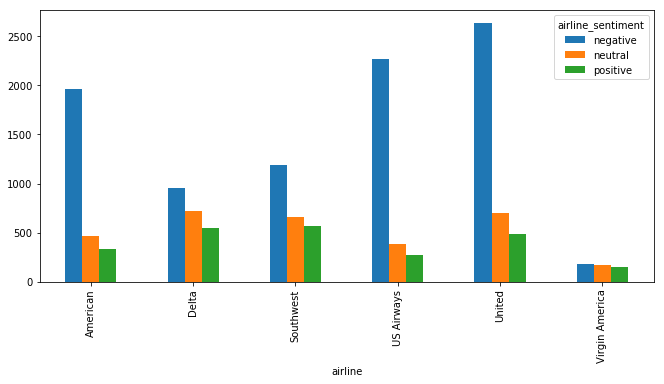

In [5]:
sentences.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))

In [6]:
sentences = sentences[['airline_sentiment', 'airline','text' ]] #this is all I need
sentences.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [7]:
sentences = sentences[sentences['airline']=='United'] #filtering dataset for United
print(len(sentences))
sentences = sentences.reset_index(drop = True)
sentences.head(10)

3822


,airline_sentiment,airline,text
0,positive,United,@united thanks
1,positive,United,@united Thanks for taking care of that MR!! Ha...
2,negative,United,@united still no refund or word via DM. Please...
3,negative,United,@united Delayed due to lack of crew and now de...
4,positive,United,@united thanks -- we filled it out. How's our ...
5,negative,United,@united Your ERI-ORD express connections are h...
6,neutral,United,@united even on international flight Glasgow t...
7,negative,United,@united you think you boarded flight AU1066 to...
8,neutral,United,"@united I understand, but it's tough when ther..."
9,negative,United,@united Gate agent hooked me up with alternate...


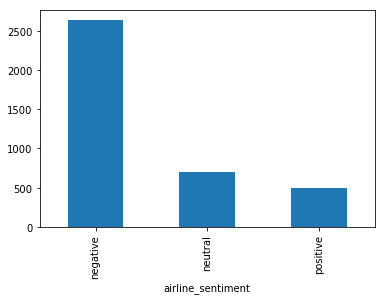

In [8]:
sentences.groupby('airline_sentiment').size().plot(kind='bar')

### Quick example of our ML/AI engine - VADER (a Python package)

In [9]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [10]:
print_sentiment_scores("United flight was a bad experience") #Compound value scale = -1 to 1 (-ve to +ve)

United flight was a bad experience------ {'neg': 0.376, 'neu': 0.323, 'pos': 0.301, 'compound': -0.1779}


### Calculating score for each tweet in the dataframe/dataset

In [11]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(sentences)):

    k = analyser.polarity_scores(sentences.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


3822

In [12]:
sentences['VADER score'] = compval1

In [13]:
sentences.head(20)

,airline_sentiment,airline,text,VADER score
0,positive,United,@united thanks,0.4404
1,positive,United,@united Thanks for taking care of that MR!! Ha...,0.8856
2,negative,United,@united still no refund or word via DM. Please...,-0.2732
3,negative,United,@united Delayed due to lack of crew and now de...,-0.2960
4,positive,United,@united thanks -- we filled it out. How's our ...,0.7399
5,negative,United,@united Your ERI-ORD express connections are h...,0.7495
6,neutral,United,@united even on international flight Glasgow t...,0.0000
7,negative,United,@united you think you boarded flight AU1066 to...,0.0000
8,neutral,United,"@united I understand, but it's tough when ther...",-0.8957
9,negative,United,@united Gate agent hooked me up with alternate...,0.2103


In [14]:
%time

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] > 0) & (sentences.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1
        

Wall time: 0 ns


In [15]:
sentences['predicted sentiment'] = predicted_value

In [16]:
len(sentences['predicted sentiment'])

3822

In [17]:
sentences.head(20)

,airline_sentiment,airline,text,VADER score,predicted sentiment
0,positive,United,@united thanks,0.4404,neutral
1,positive,United,@united Thanks for taking care of that MR!! Ha...,0.8856,positive
2,negative,United,@united still no refund or word via DM. Please...,-0.2732,negative
3,negative,United,@united Delayed due to lack of crew and now de...,-0.2960,negative
4,positive,United,@united thanks -- we filled it out. How's our ...,0.7399,positive
5,negative,United,@united Your ERI-ORD express connections are h...,0.7495,positive
6,neutral,United,@united even on international flight Glasgow t...,0.0000,negative
7,negative,United,@united you think you boarded flight AU1066 to...,0.0000,negative
8,neutral,United,"@united I understand, but it's tough when ther...",-0.8957,negative
9,negative,United,@united Gate agent hooked me up with alternate...,0.2103,neutral


## Let's take a closer look at our results

In [18]:
madeit = sentences[sentences['airline_sentiment']== sentences['predicted sentiment']]

In [19]:
len(madeit)/len(sentences)

0.5826792255363684

In [20]:
madeit.head(20)

,airline_sentiment,airline,text,VADER score,predicted sentiment
1,positive,United,@united Thanks for taking care of that MR!! Ha...,0.8856,positive
2,negative,United,@united still no refund or word via DM. Please...,-0.2732,negative
3,negative,United,@united Delayed due to lack of crew and now de...,-0.2960,negative
4,positive,United,@united thanks -- we filled it out. How's our ...,0.7399,positive
7,negative,United,@united you think you boarded flight AU1066 to...,0.0000,negative
14,negative,United,@united is the worst. Nonrefundable First clas...,-0.6249,negative
16,negative,United,@united I did start a claim but 8-10 weeks is ...,0.0000,negative
18,neutral,United,"@united no I don't, but I'm sure United have m...",0.1672,neutral
19,negative,United,@united if the car seat is lost @united should...,-0.3182,negative
21,neutral,United,"@united yes, David Allan send an email with th...",0.4723,neutral


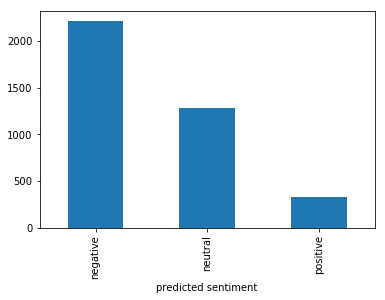

In [21]:

sentences.groupby('predicted sentiment').size().plot(kind='bar')

In [22]:
didntmakeit = sentences[sentences['airline_sentiment'] != sentences['predicted sentiment']]

In [23]:
didntmakeit.reset_index(drop=True, inplace=True)
didntmakeit.head(20)

,airline_sentiment,airline,text,VADER score,predicted sentiment
0,positive,United,@united thanks,0.4404,neutral
1,negative,United,@united Your ERI-ORD express connections are h...,0.7495,positive
2,neutral,United,@united even on international flight Glasgow t...,0.0000,negative
3,neutral,United,"@united I understand, but it's tough when ther...",-0.8957,negative
4,negative,United,@united Gate agent hooked me up with alternate...,0.2103,neutral
5,neutral,United,@united flying gla-mco in a few weeks. How lon...,0.0000,negative
6,positive,United,@united thanks,0.4404,neutral
7,positive,United,@united Thanks. It is on the same ticket.,0.4404,neutral
8,neutral,United,@united why not? Is it a law or a policy?,0.0000,negative
9,negative,United,@united @CheerTymeDad So I can buy tix 3 days ...,0.4767,neutral


## Examples of where our algorithm did not make the correct prediction

In [24]:
didntmakeit.iloc[8]

airline_sentiment                                        neutral
airline                                                   United
text                   @united why not? Is it a law or a policy?
VADER score                                                    0
predicted sentiment                                     negative
Name: 8, dtype: object

In [25]:
didntmakeit.iloc[8]['text']

'@united why not? Is it a law or a policy?'

### Recurring themes/words in the NEGATIVELY branded tweets

In [26]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [27]:
df = madeit[madeit['predicted sentiment']=='negative']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("flight")
stopwords.add("united")
stopwords.add("plane")
stopwords.add("now")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [28]:
type(cleaned_word)

str

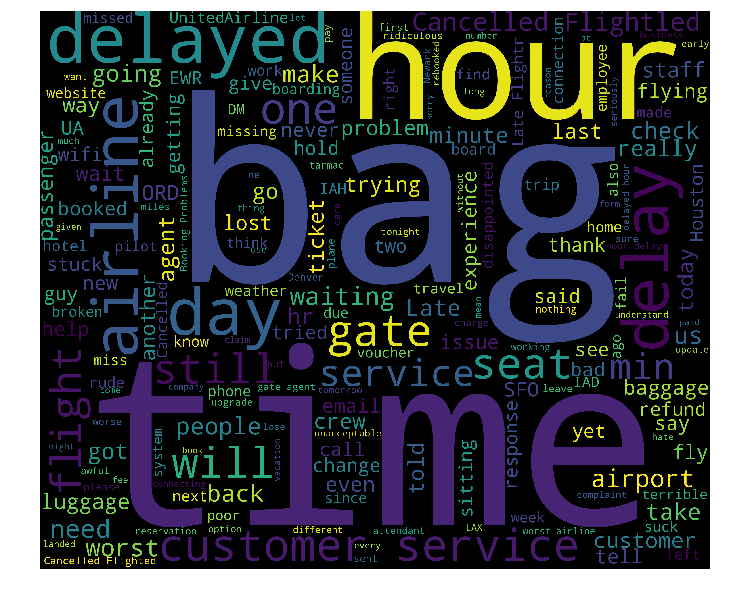

In [29]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Recurring themes/words in the POSITIVELY branded tweets

In [30]:
df = madeit[madeit['predicted sentiment']=='positive']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word !='&amp'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("flight")
stopwords.add("flights")
stopwords.add("united")
stopwords.add("plane")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

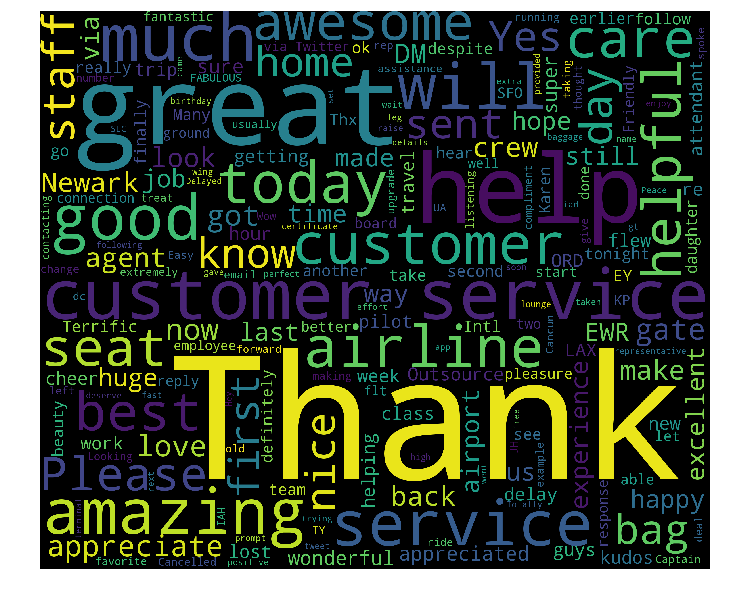

In [31]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()